In [2]:
import pandas as pd

df = pd.read_csv('dataset/training_twitter.csv', encoding='latin-1')
# Manually define each column a title to extract the values in the data
df.columns = ['polarity','id','date','query','user','text']

In [3]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df['text'].value_counts()

text
isPlayer Has Died! Sorry                                                                              210
good morning                                                                                          118
headache                                                                                              115
Good morning                                                                                          112
Headache                                                                                              106
                                                                                                     ... 
braces  tell me it will be okay...                                                                      1
is stuck at home without curry                                                                          1
@mrsduryee I've applied to about 70 since I lost my job in March...it certainly FEELS like a lot!       1
The cheese I got @SarawithanR lost its sq

In [4]:
import re

def preprocess_data(text):
    text = text.lower()
    text = re.sub(r"(@|https?)\S+|#", '', text) # Remove mentions, urls and symbols           
    text = re.sub(r"[^a-zA-Z\s]", "", text)    # Remove punctuation and numbers
    text = re.sub(r"\s+", " ", text).strip()   # Normalize spaces     
    return text

print(preprocess_data("This is A test! @Hello Hi http://example.com 😃"))

this is a test hi


In [7]:
df['clean_text'] = df['text'].apply(preprocess_data)

In [8]:
df['clean_text']

0          is upset that he cant update his facebook by t...
1          i dived many times for the ball managed to sav...
2             my whole body feels itchy and like its on fire
3          no its not behaving at all im mad why am i her...
4                                         not the whole crew
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995      thewdbcom very cool to hear old walt interviews
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy th birthday to my boo of alll time tupac...
1599998                                 happy charitytuesday
Name: clean_text, Length: 1599999, dtype: object

In [30]:
from sklearn.model_selection import train_test_split

x = df['clean_text']
y = df['polarity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# First Technique is Bag of Words (Frequency Based)

from sklearn.feature_extraction.text import CountVectorizer #(Bag of Words)

vectorizer = CountVectorizer(max_features=100)
x_train_vec_bow = vectorizer.fit_transform(x_train)
x_test_vec_bow = vectorizer.transform(x_test)

In [11]:
x_train_vec_bow

<1279999x360847 sparse matrix of type '<class 'numpy.int64'>'
	with 14157805 stored elements in Compressed Sparse Row format>

In [12]:
# Second Technique is Word Embeddings

from gensim.models import Word2Vec
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [13]:
tokenized_data = [sentence.split() for sentence in x_train]

# Train Word2Vec
model1 = Word2Vec(sentences=tokenized_data, min_count=1, window=5)

In [14]:
# Testing the wordVec where movie is the vector and printing its outcome
print(model1.wv["movie"])  
print(model1.wv.most_similar("movie"))

[-2.7466056  -1.7800543   1.6042975   0.5779279  -1.7702662   1.1534855
 -1.7240819   0.21513402 -3.9005716   1.1322812  -0.78581476  2.879077
  1.9969534  -1.7906826  -1.3932972  -0.94102234  2.544531   -1.92495
 -0.90698135 -2.7080054  -2.1358068   1.4760904  -0.35311005  2.2814522
  0.48052394  0.3930552  -1.8237642  -2.4496949  -3.9316566  -0.4636517
  0.6628385  -1.733045    1.9487039   1.8893884  -1.2860225  -1.2045921
 -0.21424031  1.2188512   2.3016996   1.2752763   1.4968098  -0.30844992
 -0.7840766   2.210443    2.008586    0.07678808 -1.1503472   0.8120698
 -1.123689   -0.6903408   1.9611881  -0.6907571   0.98440224  0.8728643
 -0.38464898  1.3542913  -1.1849657  -0.17653319  1.9857496  -0.24472387
 -3.324054    0.25898218  0.45042008 -1.3474292  -0.964384    3.03712
 -3.1576128   0.34577566 -2.543217    0.50256974  2.7966537   2.7633057
  1.269399   -2.2949543  -1.9529835  -0.21156855  2.4826136  -2.152096
 -2.218153   -0.6804502  -3.8494244  -3.0320513  -0.97738194 -1.7822

In [15]:
import numpy as np

def meanEmbeddings(model, words):
    # keep only words that are in the vocab
    words = [word for word in words if word in model.wv]
    
    if len(words) > 0:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)  # return zero vector if no valid words

In [16]:
# Tokenize sentences first
tokenized_train = [sentence.split() for sentence in x_train]
tokenized_test  = [sentence.split() for sentence in x_test]

# Convert each sentence into averaged embeddings
x_train_w2v = np.array([meanEmbeddings(model1, words) for words in tokenized_train])
x_test_w2v  = np.array([meanEmbeddings(model1, words) for words in tokenized_test])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Using Vectorized data from Bag of Words to train on Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_vec_bow, y_train)
y_pred_bow = logreg.predict(x_test_vec_bow)

print("Bag Of Words Accuracy On Logistic Regression:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

Bag Of Words Accuracy On Logistic Regression: 0.661184375
              precision    recall  f1-score   support

           0       0.67      0.63      0.65    159494
           4       0.65      0.69      0.67    160506

    accuracy                           0.66    320000
   macro avg       0.66      0.66      0.66    320000
weighted avg       0.66      0.66      0.66    320000



In [33]:
import pickle
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
pickle.dump(logreg, open("logreg.pkl", "wb"))

In [18]:
# Using Vectorized data from Word2Vec to train on Logistic Regression

logreg.fit(x_train_w2v, y_train)
y_pred_w2v = logreg.predict(x_test_w2v)

print("Word2Vec Accuracy On Logistic Regression:", accuracy_score(y_test, y_pred_w2v))
print(classification_report(y_test, y_pred_w2v))

Word2Vec Accuracy On Logistic Regression: 0.756303125
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    160000
           4       0.76      0.76      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [19]:
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB()
naive_model.fit(x_train_vec_bow, y_train)

y_pred_bow = naive_model.predict(x_test_vec_bow)

print("Bag Of Words Accuracy On Naive Bayes:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

Bag Of Words Accuracy On Naive Bayes: 0.780703125
              precision    recall  f1-score   support

           0       0.77      0.80      0.79    160000
           4       0.79      0.76      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify based on VADER compound score
def vader_sentiment(sentence):
    score = analyzer.polarity_scores(sentence)['compound']
    if score >= 0:   
        return 1     # positive
    else:
        return 0     # negative

# Apply to test set
y_pred_vader = [vader_sentiment(sentence) for sentence in x_test]

# Evaluate
print("VADER Accuracy:", accuracy_score(y_test, y_pred_vader))
print(classification_report(y_test, y_pred_vader,zero_division=0))

VADER Accuracy: 0.218596875
              precision    recall  f1-score   support

           0       0.80      0.44      0.57    160000
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00    160000

    accuracy                           0.22    320000
   macro avg       0.27      0.15      0.19    320000
weighted avg       0.40      0.22      0.28    320000



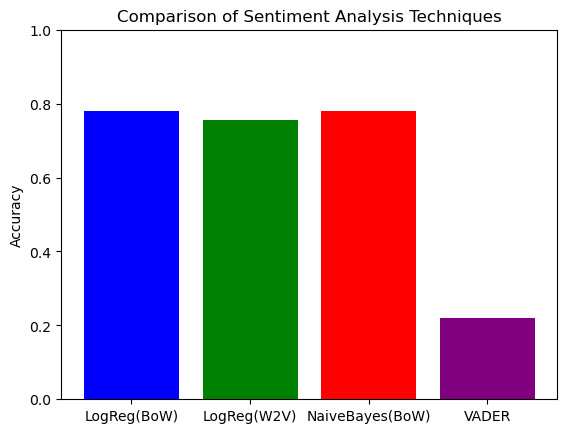

In [25]:
import matplotlib.pyplot as plt

# Can't do Word2Vec on NaiveBayes because there are negative values so NaiveBayes doesnt work
results = {
    "LogReg(BoW)": accuracy_score(y_test, y_pred_bow),
    "LogReg(W2V)":  accuracy_score(y_test, y_pred_w2v),
    "NaiveBayes(BoW)": accuracy_score(y_test, y_pred_bow),
    "VADER" : accuracy_score(y_test, y_pred_vader)
}

plt.bar(results.keys(), results.values(), color=["blue", "green", "red","purple"])
plt.ylabel("Accuracy")
plt.title("Comparison of Sentiment Analysis Techniques")
plt.ylim(0, 1)

plt.show()


In [5]:
import pickle
import gradio as gr

# Load trained vectorizer and model (instead of redefining!)
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
logreg = pickle.load(open("logreg.pkl", "rb"))

def chatbot_response(user_input):
    text = user_input.lower()

    # Rule-based responses 
    if any(word in text for word in ["hi", "hello", "hey"]):
        return "👋 Hello! How can I help you today?"
    if any(word in text for word in ["bye", "goodbye", "see you"]):
        return "👋 Goodbye! Take care!"

    # ML-based sentiment 
    cleaned = preprocess_data(user_input)
    user_vec = vectorizer.transform([cleaned])
    
    proba = logreg.predict_proba(user_vec)[0]

    # figure out which index is positive
    if 4 in logreg.classes_:
        pos_index = list(logreg.classes_).index(4)
    else:
        pos_index = list(logreg.classes_).index(1)

    positive_prob = proba[pos_index]
    negative_prob = 1 - positive_prob  

    # Confidence indicates how confident the model think what sentiment of text is
    if positive_prob > 0.49:
        return f"😊 I'm happy to hear that! (confidence: {positive_prob:.2f})"
    elif positive_prob < 0.5:
        return f"😔 I'm sorry to hear that. (confidence: {negative_prob:.2f})"
    else:
        return f"🤔 I'm not sure what to say."


gr.Interface(
    fn=chatbot_response,
    inputs="text",
    outputs="text",
    title="Mini Chatbot "
).launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
